In [1]:
import os
os.chdir('..')

In [2]:
## it’s mine, my own, 
from modules.get_data import get_x_y
from jh_utils.data.pandas.preprocessing import make_dummies
from modules.evaluation import fit_classify, print_2_reports, plot_false_negative_rate

In [3]:
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
## posfit
from sklearn.metrics import roc_auc_score, precision_recall_curve, det_curve
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import classification_report,confusion_matrix

In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

2023-07-17 19:07:22.968222: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-17 19:07:23.585840: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
x,y = get_x_y()
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=42)
scaler = MinMaxScaler()
#scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

/home/joaoholz/Documents/ufes/trabalho_final/modules/get_data.py:6: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv("asteroides/asteoides.csv").iloc[:, first_columns:]


In [12]:
def declare_model(n_layers=[16,8], loss = "binary_crossentropy", optimizer = "adam", last_layer_activation = "sigmoid"):
    tf_model = Sequential()
    tf_model.add(Dense(10, activation='relu', input_shape=(38,)))
    for i in n_layers:
        tf_model.add(Dense(i, activation='relu'))
    tf_model.add(Dense(1, activation=last_layer_activation))
    tf_model.compile(loss=loss, optimizer=optimizer, metrics = [tf.keras.metrics.Precision(),'accuracy'])
    return tf_model

----

## 5 layer model

---

In [28]:
tf.random.set_seed(2023)
tf_model = declare_model([16,16,10])

In [29]:
tf_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 10)                390       
                                                                 
 dense_14 (Dense)            (None, 16)                176       
                                                                 
 dense_15 (Dense)            (None, 16)                272       
                                                                 
 dense_16 (Dense)            (None, 10)                170       
                                                                 
 dense_17 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,019
Trainable params: 1,019
Non-trainable params: 0
_________________________________________________________________


In [30]:
tf_model.count_params()

1019

In [31]:
tf_model.fit(x_train,y_train, epochs=100, batch_size=128, verbose=1)

Epoch 1/100
5099/5099 [==============================] - 16s 3ms/step - loss: 0.0120 - precision_3: 0.0233 - accuracy: 0.9977
Epoch 2/100
5099/5099 [==============================] - 15s 3ms/step - loss: 0.0051 - precision_3: 0.0000e+00 - accuracy: 0.9978
Epoch 3/100
5099/5099 [==============================] - 15s 3ms/step - loss: 0.0048 - precision_3: 0.0000e+00 - accuracy: 0.9978
Epoch 4/100
5099/5099 [==============================] - 15s 3ms/step - loss: 0.0046 - precision_3: 0.5965 - accuracy: 0.9979
Epoch 5/100
5099/5099 [==============================] - 15s 3ms/step - loss: 0.0044 - precision_3: 0.5792 - accuracy: 0.9979
Epoch 6/100
5099/5099 [==============================] - 14s 3ms/step - loss: 0.0043 - precision_3: 0.5631 - accuracy: 0.9979
Epoch 7/100
5099/5099 [==============================] - 15s 3ms/step - loss: 0.0042 - precision_3: 0.5940 - accuracy: 0.9980
Epoch 8/100
5099/5099 [==============================] - 15s 3ms/step - loss: 0.0040 - precision_3: 0.5953 - a

In [32]:
y_prob = tf_model.predict(x_test)

8741/8741 [==============================] - 8s 878us/step


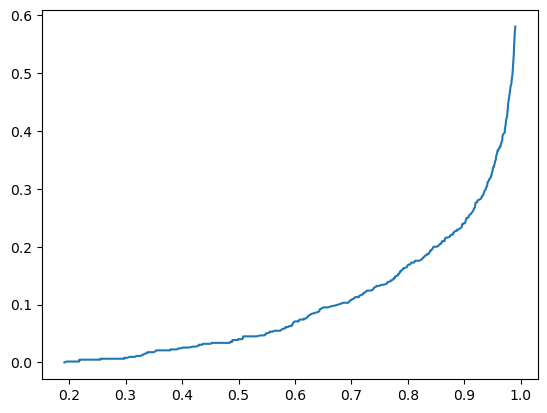

In [33]:
plot_false_negative_rate(y_test,y_prob)

In [34]:
y_pred = list(map(lambda x: x>0.5, y_prob))
print_2_reports(y_test,y_pred)

y_pred = list(map(lambda x: x>0.25, y_prob))
print_2_reports(y_test,y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    279081
           1       0.88      0.96      0.92       620

    accuracy                           1.00    279701
   macro avg       0.94      0.98      0.96    279701
weighted avg       1.00      1.00      1.00    279701

        N    Y
N  279002   79
Y      25  595
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    279081
           1       0.77      1.00      0.87       620

    accuracy                           1.00    279701
   macro avg       0.88      1.00      0.93    279701
weighted avg       1.00      1.00      1.00    279701

        N    Y
N  278895  186
Y       3  617


In [35]:
y_pred = list(map(lambda x: x>0.15, y_prob))
print_2_reports(y_test,y_pred)

y_pred = list(map(lambda x: x>0.05, y_prob))
print_2_reports(y_test,y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    279081
           1       0.70      1.00      0.83       620

    accuracy                           1.00    279701
   macro avg       0.85      1.00      0.91    279701
weighted avg       1.00      1.00      1.00    279701

        N    Y
N  278819  262
Y       0  620
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    279081
           1       0.61      1.00      0.76       620

    accuracy                           1.00    279701
   macro avg       0.80      1.00      0.88    279701
weighted avg       1.00      1.00      1.00    279701

        N    Y
N  278679  402
Y       0  620


In [36]:
tf_model.save_weights('models/tf_model_5layers')